In [1]:
import numpy as np
import matplotlib.pyplot as plt

nagrade = {'a1':0, 'b1':2, 'c1':1, 'd1':-1, 'e1':1, 
           'a2':1, 'b2':1, 'c2':2, 'd2':0, 'e2':2,
           'a3':3, 'b3':-5, 'c3':4, 'd3':3, 'e3':1,
           'a4':1, 'b4':-2, 'c4':4, 'd4':1, 'e4':2,
           'a5':1, 'b5':1, 'c5':2, 'd5':1, 'e5':1,}

In [2]:
def kretanje(pocetno_stanje,akcija):
  
  naredno_stanje = {'a':'b', 'b':'c', 'c':'d', 'd':'e'}

  # ako je akcija desno
  if akcija == 1:
    if pocetno_stanje[0] == 'e':
      return 'a1', 0, True
    else:
      stanje = naredno_stanje[pocetno_stanje[0]] + pocetno_stanje[1]
      return stanje, nagrade[stanje], False
  # ako je akcija dole
  if akcija == 0:
    if pocetno_stanje[1] == '5':
      return 'a1', 0, True
    else:
      stanje = pocetno_stanje[0] + str(int(pocetno_stanje[1])+1)
      return stanje, nagrade[stanje], False

In [3]:
def simulator_epizode(politika):

  vrsta = {'a':0, 'b':1, 'c':2, 'd':3, 'e':4}
  stanje = 'a1'
  nagrada = 0
  kraj_epizode = False
  while not(kraj_epizode):
    stanje, pom_nagrada, kraj_epizode = kretanje(stanje,politika[int(stanje[1])-1,vrsta[stanje[0]]])
    nagrada = nagrada + pom_nagrada

  return nagrada

In [ ]:
# Q ucenje
T = 100000 # broj epoha
# funkcije akcije
r_nagrade = [[0,2,1,-1,1],[1,1,2,0,2],[3,-5,4,3,1],[1,-2,4,1,2],[1,1,2,1,1]]
r_nagrade = np.array(r_nagrade)
q = np.zeros([5,5,2]) # 5x 5 mogucih stanja i usvakom po 2 akcije
q[:,:,0] = r_nagrade
q[:,:,1] = r_nagrade
v = np.array([])
stanje ='a1' # pocetno stanje je uvijek isto
epsilon = 1 # gramzivo istrazivanje 0,02
num = 0 # broj koliko puta je stohasticno birao akciju
e  = 0 # redni broj epizode
vrste = {'a':0, 'b':1, 'c':2, 'd':3, 'e':4}

for t in range(0,T): # po epohama
  r = nagrade[stanje]
  vrsta = vrste[stanje[0]]
  kolona = int(stanje[1])-1
  alpha = np.log(e+1)/(e+1)
  #alpha = 0.02
  for akcija in range(0,2): # po akcijama
      novo_stanje, nagrada, kraj_epizode = kretanje(stanje,akcija)
      if not(kraj_epizode): 
        q_pom = max(q[int(novo_stanje[1])-1,vrste[novo_stanje[0]],:])    
        q[kolona,vrsta,akcija] = q[kolona,vrsta,akcija] + alpha * (q_pom - q[kolona,vrsta,akcija] + r)
  if np.random.rand() < epsilon:
    akcija = int(np.floor(np.random.rand()*2))
    num = num + 1
  else:
    akcija = np.argmax(q[kolona,vrsta,:])
  stanje, nagrada, kraj_epizode = kretanje(stanje,akcija)
  if kraj_epizode:
    e = e + 1
    if len(v) == 0:
      v = np.append(v,np.max(q,axis=2))
      v = np.reshape(v,[len(v),1])
    else:
      v = np.append(v, np.reshape(np.max(q,axis=2),[25,1]), axis = 1)

politika = np.argmax(q,axis = 2)
print(politika)

print('Broj stohasticnih akcija ' + str(num))      
print('Broj epizoda ' + str(e))      

print('Nagrada:')
print(simulator_epizode(politika))

[[1 0 0 0 0]
 [1 1 0 0 0]
 [1 1 0 0 0]
 [1 1 1 1 0]
 [1 1 1 1 0]]
Broj stohasticnih akcija 100000
Broj epizoda 13296
Nagrada:
17


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  after removing the cwd from sys.path.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  after removing the cwd from sys.path.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: MatplotlibDeprecationWarning: Adding an axes using the same arguments as

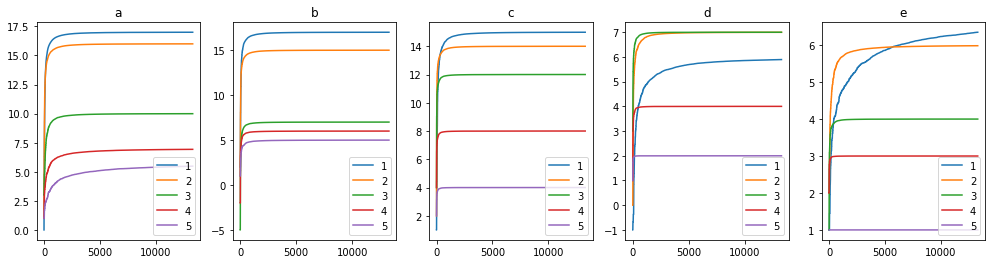

In [ ]:
plt.figure(figsize=(17,4))
for j in range(0,5):
  for i in range(0,5):
    plt.subplot(1,5,i+1)
    plt.plot(v[i + j*5,:])
naslov = ['a','b','c','d','e']
for i in range(0,5):
  plt.subplot(1,5,i+1)
  plt.legend(['1','2','3','4','5'])
  plt.title(naslov[i])

In [ ]:
q[:,:,0]

array([[15.99281464, 16.99428834, 14.99085987,  5.89397266,  6.34937008],
       [10.9858478 ,  7.99671233, 13.99810914,  6.99694422,  5.98457167],
       [ 9.86022528,  0.99573299, 11.99920383,  6.99969658,  3.99971988],
       [ 6.02467735,  2.98202669,  7.99964634,  2.99997309,  2.99999189],
       [ 1.        ,  1.        ,  2.        ,  1.        ,  1.        ]])

In [ ]:
q[:,:,1]

array([[16.99275674, 16.98504788,  6.79692719,  4.80829332,  1.        ],
       [15.99432779, 14.99670472,  8.99286251,  5.96059853,  2.        ],
       [ 9.99126104,  6.99808737, 10.99911192,  6.99903621,  1.        ],
       [ 6.9263893 ,  5.99802912,  7.99969411,  3.9999422 ,  2.        ],
       [ 5.48248579,  4.99279796,  3.99989644,  1.99999622,  1.        ]])

In [ ]:
def izbor_roditelja(hromozomi,nagrade):

  p = np.random.rand()
  redni_broj_roditelja = 0
  cdf = nagrade[0]
  while cdf <= p:
      redni_broj_roditelja = redni_broj_roditelja + 1
      cdf = cdf  + nagrade[redni_broj_roditelja]
  
  return hromozomi[redni_broj_roditelja]

In [ ]:
def ukrstanje(prvi_roditelj,drugi_roditelj):

  ukrstanje = int(np.random.rand() * len(prvi_roditelj))
  dijete = np.zeros(len(prvi_roditelj))
  dijete[0:ukrstanje] = prvi_roditelj[0:ukrstanje]
  dijete[ukrstanje:] = drugi_roditelj[ukrstanje:]

  return dijete

In [ ]:
def mutacije(hromozom):

  for i in range(0,len(hromozom)):
    if np.random.rand() < 0.05:
      hromozom[i] = 1 - hromozom[i]

  return hromozom 

[[1. 0. 1. 0. 0.]
 [0. 1. 0. 0. 1.]
 [1. 1. 0. 0. 1.]
 [0. 1. 0. 1. 1.]
 [1. 0. 1. 1. 1.]]
Nagrada: 17


Text(0, 0.5, 'nagrada')

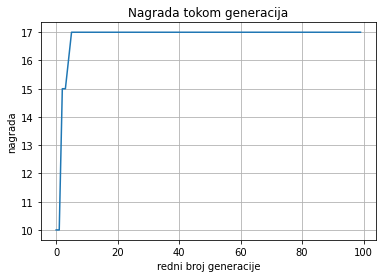

In [ ]:
# genski algoritam
N = 5 # broj hromozoma u populaciji
hromozom = np.zeros([N,25])
niz_nagrada = np.zeros(N)

# roditelji
for i in range(0,N):
  for j in range(0,25):
    if np.random.rand() < 0.5:
      hromozom[i,j] = 1
  politika = np.transpose(np.reshape(hromozom[i,:],[5,5]))
  niz_nagrada[i] = simulator_epizode(politika)
# normalizovanje nagrada na vjerovatnoce
niz_nagrada = niz_nagrada/sum(niz_nagrada)

T =100 # broj generacija
nagrade_kroz_generacije = np.zeros(T)
elitizam = True

for t in range(0,T):
  djeca_hromozomi = np.zeros([N,25])
  if elitizam:
    pom_nagrade = np.array(niz_nagrada)
    N0 = 1
    for i in range(0,N0):
      djeca_hromozomi[i,:] = hromozom[np.argmax(pom_nagrade),:]
      pom_nagrade[np.argmax(pom_nagrade)] = 0
  else:
    N0 = 0
  for i in range(N0,N):
    prvi_roditelj = izbor_roditelja(hromozom,niz_nagrada)
    drugi_roditelj = izbor_roditelja(hromozom,niz_nagrada)
    while sum(abs(prvi_roditelj - drugi_roditelj)):
      drugi_roditelj = izbor_roditelja(hromozom,niz_nagrada)
    djeca_hromozomi[i] = ukrstanje(prvi_roditelj,drugi_roditelj)
    djeca_hromozomi[i] = mutacije(djeca_hromozomi[i])
  hromozom = djeca_hromozomi
  for i in range(0,N):
    politika = np.transpose(np.reshape(hromozom[i,:],[5,5]))
    niz_nagrada[i] = simulator_epizode(politika)
  niz_nagrada = niz_nagrada/sum(niz_nagrada)
  politika = hromozom[np.argmax(niz_nagrada),:]
  politika = np.transpose(np.reshape(politika,[5,5]))
  nagrade_kroz_generacije[t] = simulator_epizode(politika)
    
politika = hromozom[np.argmax(niz_nagrada),:]
politika = np.transpose(np.reshape(politika,[5,5]))

print(politika)
print('Nagrada: ' + str(simulator_epizode(politika)))

plt.plot(nagrade_kroz_generacije)
plt.grid()
plt.title('Nagrada tokom generacija')
plt.xlabel('redni broj generacije')
plt.ylabel('nagrada')

In [ ]:
for i in range(0,5):
  print('Politika :' + str(i+1))
  print(hromozom[i,:])
  politika = hromozom[i,:]
  politika = np.transpose(np.reshape(politika,[5,5]))
  print('Fitnes funkcija: ' + str(simulator_epizode(politika)))

Politika :1
[1. 0. 1. 0. 1. 0. 1. 1. 1. 0. 1. 0. 0. 0. 1. 0. 0. 0. 1. 1. 0. 1. 1. 1.
 1.]
Fitnes funkcija: 17
Politika :2
[1. 0. 1. 0. 1. 0. 1. 1. 1. 0. 1. 0. 1. 0. 1. 0. 0. 0. 1. 1. 0. 1. 1. 1.
 1.]
Fitnes funkcija: 15
Politika :3
[1. 0. 1. 0. 1. 0. 1. 1. 1. 0. 1. 0. 1. 0. 1. 0. 0. 0. 1. 1. 0. 1. 1. 1.
 1.]
Fitnes funkcija: 15
Politika :4
[1. 0. 1. 0. 1. 0. 1. 1. 1. 1. 1. 0. 1. 0. 1. 0. 0. 0. 1. 1. 0. 1. 1. 1.
 1.]
Fitnes funkcija: 15
Politika :5
[1. 0. 1. 0. 1. 0. 1. 1. 1. 0. 1. 0. 1. 0. 1. 0. 0. 0. 1. 1. 0. 1. 1. 1.
 1.]
Fitnes funkcija: 15


In [ ]:
# formiranje roditelja
def formiraj_roditelja():

  slova = ['a', 'b', 'c', 'd', 'e', '#']
  brojevi = ['1', '2', '3', '4', '5', '#']
  
  hromozom = []

  p = np.random.rand()
  indeks = 1
  while p > indeks/6:
    indeks = indeks + 1
  hromozom.append(slova[indeks - 1])

  p = np.random.rand()
  indeks = 1
  while p > indeks/6:
    indeks = indeks + 1
  hromozom.append(brojevi[indeks - 1])

  p = np.random.rand()
  if p > 0.5:
    hromozom.append(1)
  else:
    hromozom.append(0)
  
  return hromozom

In [ ]:
def ukrstanje_rule(mama,tata):

  dijete = []
  for i in range(0,3):
    if np.random.rand() > 0.5:
      dijete.append(tata[i])
    else:
      dijete.append(mama[i])
      
  return dijete

In [ ]:
def mutacije_rule(hromozom):

  slova = ['a', 'b', 'c', 'd', 'e', '#']
  brojevi = ['1', '2', '3', '4', '5', '#']
  novi_hromozom = []
  prag = 0.05

  if np.random.rand() > prag:
    novi_hromozom.append(hromozom[0])
  else:
      p = np.random.rand()
      indeks = 1
      while p > indeks/6:
        indeks = indeks + 1
      novi_hromozom.append(slova[indeks - 1])

  if np.random.rand() > prag:
    novi_hromozom.append(hromozom[1])
  else:
      p = np.random.rand()
      indeks = 1
      while p > indeks/6:
        indeks = indeks + 1
      novi_hromozom.append(brojevi[indeks - 1]) 

  if np.random.rand() > prag:
    novi_hromozom.append(hromozom[2])
  else:
    if np.random.rand() > 0.5:
      novi_hromozom.append(1)
    else:
      novi_hromozom.append(0)

  return novi_hromozom 


In [ ]:
def prikaz_politike(politika,snage):

  stanje = 'a1'
  kraj_epizode = False
  nagrada = 0

  while not(kraj_epizode):
    akcija = 0
    jacina = 0
    indeks = -5
    # pretrazuje pravila i trazi ono  sa najvecom snagom
    for i in range(0,len(politika)):
      pom = politika[i]
      if pom[0] == stanje[0] or pom[0] == '#':
        if pom[1] == stanje[1] or pom[1] == '#':
          if snage[i] > jacina:
            akcija = pom[2]
            jacina = snage[i]
            indeks = i
    # ako je pronadjeno pravilo
    if indeks >= 0:
      print(politika[indeks], niz_nagrada[indeks])
    else:
      print('slucajan izbor')
    stanje, pom_nagrada, kraj_epizode = kretanje(stanje,akcija)
    nagrada = nagrada + pom_nagrada
  
  return


In [ ]:
def rule_based_fitnes(hromozomi,snage):

  stanje = 'a1'
  nagrada = nagrade[stanje]
  kraj_epizode = False
  upotreba = np.zeros(len(snage))
  br_poteza = 0

  while not(kraj_epizode):
    br_poteza = br_poteza + 1
    if np.random.rand() > 0.5:
      akcija = 1
    else:
      akcija = 0
    jacina = 0
    indeks = -5
    # pretrazuje pravila i trazi ono  sa najvecom snagom
    for i in range(0,len(hromozomi)):
      pom = hromozomi[i]
      if pom[0] == stanje[0] or pom[0] == '#':
        if pom[1] == stanje[1] or pom[1] == '#':
          if snage[i] > jacina:
            akcija = pom[2]
            jacina = snage[i]
            indeks = i
    # ako je pronadjeno pravilo
    if indeks >= 0:
      upotreba[indeks] = upotreba[indeks] + 1
    stanje, pom_nagrada, kraj_epizode = kretanje(stanje,akcija)
    nagrada = nagrada + pom_nagrada

  return nagrada, upotreba

Politika: 
['a', '#', 1] 0.26372392489388535
['#', '#', 1] 0.2637239248932649
['c', '#', 0] 0.26372392489344665
['c', '#', 0] 0.26372392489344665
['c', '#', 0] 0.26372392489344665
['#', '4', 0] 0.27634231153958627
['#', '5', 1] 0.2644435616196043
['#', '5', 1] 0.2644435616196043
['#', '5', 1] 0.2644435616196043
17
Prva nagrada: 6
Najbolja nagrada: 17


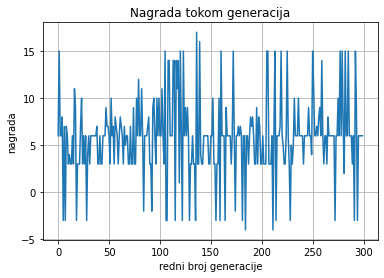

In [ ]:
# rule - based evolutivni algoritam
N = 40 # broj hromozoma u populaciji

hromozom = []
niz_nagrada = np.ones(N) * 0.5
pom_niz_nagrada = np.zeros(N)

najbolja_nagrada = 0
roditelji = []
prva_nagrada = 0

# roditelji
for i in range(0,N):
  hromozom.append(formiraj_roditelja())
roditelji = hromozom
cds, upotreba = rule_based_fitnes(hromozom,niz_nagrada)
prva_nagrada = cds
for i in range(0,N):
  niz_nagrada[i] = niz_nagrada[i] + upotreba[i]/(18 - cds)
# normalizovanje nagrada na vjerovatnoce
niz_nagrada = niz_nagrada/sum(niz_nagrada)

T =300 # broj generacija
nagrade_kroz_generacije = np.zeros(T)
elitizam = False

for t in range(0,T):
  djeca_hromozomi = []
  if elitizam:
    pom_nagrade = np.array(niz_nagrada)
    N0 = 1
    for i in range(0,N0):
      djeca_hromozomi[i,:] = hromozom[np.argmax(pom_nagrade),:]
      pom_nagrade[np.argmax(pom_nagrade)] = 0
  else:
    N0 = 0
  for i in range(N0,N):
    nagrada1 = 0.5
    prvi_roditelj = izbor_roditelja(hromozom,niz_nagrada)
    nagrada2 = 0.5
    drugi_roditelj = izbor_roditelja(hromozom,niz_nagrada)
    while prvi_roditelj == drugi_roditelj:
      drugi_roditelj = izbor_roditelja(hromozom,niz_nagrada)
    dijete = ukrstanje_rule(prvi_roditelj,drugi_roditelj)
    djeca_hromozomi.append(mutacije_rule(dijete))
    for j in range(0,len(hromozom)):
      if hromozom[i] == prvi_roditelj:
        nagrada1 = niz_nagrada[i]
      if hromozom[j] == drugi_roditelj:
        nagrada2 = niz_nagrada[i]
    pom_niz_nagrada[i] = (nagrada1 + nagrada2)/2
  hromozom = djeca_hromozomi
  niz_nagrada = pom_niz_nagrada
  cds, upotreba = rule_based_fitnes(hromozom,niz_nagrada)
  if cds > najbolja_nagrada:
    politika = hromozom.copy()
    niz_nagrada_politike = niz_nagrada
    najbolja_nagrada = cds
  if cds == 17:
    print('Politika: ')
    prikaz_politike(hromozom,niz_nagrada)
    print(cds)
  for i in range(0,N):
    niz_nagrada[i] = niz_nagrada[i] + upotreba[i]/(18 - cds)
  # normalizovanje nagrada na vjerovatnoce
  niz_nagrada = niz_nagrada/sum(niz_nagrada)
  nagrade_kroz_generacije[t] = cds
  
   
plt.plot(nagrade_kroz_generacije)
plt.grid()
plt.title('Nagrada tokom generacija')
plt.xlabel('redni broj generacije')
plt.ylabel('nagrada')

print('Prva nagrada: ' + str(prva_nagrada))
print('Najbolja nagrada: ' + str(najbolja_nagrada))

In [ ]:
for i in range(0,len(politika)):
  if niz_nagrada[i]*100>2.41:
    print(politika[i],niz_nagrada[i]*100)

['c', '5', 0] 6.219607170246479
['e', '#', 1] 2.5907055679871442


In [ ]:
for i in range(0,len(politika)):
  if niz_nagrada[i]*100>2.77:
    print(politika[i],niz_nagrada[i]*100)

['e', '#', 1] 3.2651249223003678
['#', '5', 1] 2.824533705980562
['#', '5', 1] 2.824528283368466
['b', '5', 1] 3.2651241240514897
['d', '4', 0] 2.9499689824322037
['e', '#', 1] 3.265124922300601
['d', '5', 0] 2.82451372489
['#', '4', 1] 3.265124922300601


In [ ]:
for i in range(0,len(politika)):
  if niz_nagrada[i]*100>2.65:
    print(politika[i],niz_nagrada[i]*100)

['b', '1', 0] 3.213691084864797
['b', '4', 0] 2.920633813674003
['d', '#', 0] 6.960468317576584


In [127]:
from tensorflow import keras
from keras import Sequential
from keras.layers import InputLayer, Dense
from keras.models import Model, Input

model = Sequential()
model.add(InputLayer(batch_input_shape=(1,2)))
model.add(Dense(40, activation='relu'))
model.add(Dense(2, activation='linear'))
model.compile(loss='mse', optimizer='adam')
model.summary()

Model: "sequential_19"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_46 (Dense)            (1, 40)                   120       
                                                                 
 dense_47 (Dense)            (1, 2)                    82        
                                                                 
Total params: 202
Trainable params: 202
Non-trainable params: 0
_________________________________________________________________


INFO:tensorflow:Assets written to: saved_model/my_model/assets
INFO:tensorflow:Assets written to: saved_model/my_model/assets
Broj epizoda 117
Nagrada: 16


Text(0, 0.5, 'nagrada')

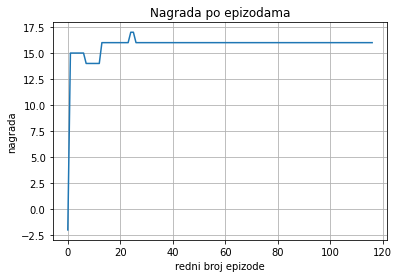

In [128]:
# neuralne mreze
T = 1000 # broj epoha
stanje ='a1' # pocetno stanje je uvijek isto
e  = 0 # redni broj epizode
epsilon = 0.2 # gramzivo biranje
vrste = {'a':0, 'b':1, 'c':2, 'd':3, 'e':4}
r = nagrade[stanje]
nagrada_po_epizodama = []
politika = np.zeros([5,5])
r_nagrade = [[0,2,1,-1,1],[1,1,2,0,2],[3,-5,4,3,1],[1,-2,4,1,2],[1,1,2,1,1]]
r_nagrade = np.array(r_nagrade)
q = np.zeros([5,5,2]) # 5x 5 mogucih stanja i u svakom po 2 akcije
q[:,:,0] = r_nagrade
q[:,:,1] = r_nagrade

for t in range(0,T): # po epohama
  #alpha = np.log(e + 1)/(e + 1)
  alpha = 0.15
  kolona = vrste[stanje[0]]
  vrsta = int(stanje[1])-1
  stanje_nn = np.reshape([vrsta,kolona],[1,2])
  if np.random.rand() > epsilon:
    akcija_nn = model.predict(stanje_nn)
    akcija = np.argmax(akcija_nn)
  else:
    if np.random.rand() > 0.5:
      akcija = 1
    else:
      akcija = 0
  novo_stanje, nagrada, kraj_epizode = kretanje(stanje,akcija)
  stanje = novo_stanje
  novo_stanje = [int(novo_stanje[1])-1, vrste[novo_stanje[0]]]
  novo_stanje = np.reshape(novo_stanje,[1,2])
  delta = alpha * (max(model.predict(novo_stanje)) - q[vrsta,kolona,int(akcija)] + nagrade[stanje])
  q[vrsta,kolona,int(akcija)] += delta[0]
  akcija_nn[0] = q[vrsta,kolona,:]
  model.fit(stanje_nn, akcija_nn, epochs=1, verbose=0)
  if kraj_epizode:
    e = e + 1
    stanje = 'a1
    r = nagrade[stanje]
    politika = np.argmax(q,axis = 2)
    ukupna_nagrada = simulator_epizode(politika)
    nagrada_po_epizodama.append(ukupna_nagrada)
    if ukupna_nagrada == 17:
      model.save('saved_model/my_model') 

print('Broj epizoda ' + str(e))      
print('Nagrada: ' + str(simulator_epizode(politika)))

plt.plot(nagrada_po_epizodama)
plt.grid()
plt.title('Nagrada po epizodama')
plt.xlabel('redni broj epizode')
plt.ylabel('nagrada')

In [129]:
model = keras.models.load_model('saved_model/my_model')

In [130]:
kraj_epizode = False
stanje = 'a1'
nagrada = 0

while not kraj_epizode:
  kolona = vrste[stanje[0]]
  vrsta = int(stanje[1])-1
  stanje_nn = np.reshape([vrsta,kolona],[1,2])
  akcija_nn = model.predict(stanje_nn)
  akcija = np.argmax(akcija_nn)
  stanje, pom, kraj_epizode = kretanje(stanje,akcija)
  nagrada += pom
  print(stanje)


b1
c1
c2
c3
d3
d4
d5
e5
a1


In [131]:
nagrada

15